In [606]:
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder # Label encoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()

# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from mlxtend.classifier import StackingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import  
# from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import model_selection
from scipy.stats import zscore

from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline


In [607]:
fund_config = pd.read_csv('../data/fund_config.csv')
fund_ratios = pd.read_csv('../data/fund_ratios.csv', thousands=',')
bond_ratings = pd.read_csv('../data/bond_ratings.csv', thousands=',')
fund_allocations = pd.read_csv('../data/fund_allocations.csv', thousands=',') # ID
fund_specs = pd.read_csv('../data/fund_specs.csv', thousands=',')
other_specs = pd.read_csv('../data/other_specs.csv', thousands=',')
return_3year = pd.read_csv('../data/return_3year.csv', thousands=',')
return_5year = pd.read_csv('../data/return_5year.csv', thousands=',')
return_10year = pd.read_csv('../data/return_10year.csv', thousands=',')
fund_allocations.rename(columns={'id': 'tag'}, inplace=True)

In [608]:
data = fund_config.merge(fund_ratios, on='fund_id' )
data = data.merge(bond_ratings, on='tag')
data = data.merge(fund_allocations, on='tag')
data = data.merge(fund_specs, on='tag')
data = data.merge(other_specs, on='tag')
data = data.merge(return_3year, on='tag')
data = data.merge(return_5year, on='tag')
data = data.merge(return_10year, on='fund_id')

In [609]:
# data.to_csv('all.csv')

In [610]:
data['greatstone_rating'] = data.apply(
    lambda row: row['greatstone_rating_y'],
    axis=1
)

In [611]:
data.head(5)

,category,parent_company,fund_id,fund_name,tag,fund_ratio_net_annual_expense,pb_ratio_x,ps_ratio_x,mmc_x,pc_ratio_x,...,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category,greatstone_rating
0,Energy Limited Partnership,DWS,264614c6-5ac3-4146-ba26-1674b136cb40,DWS RREEF MLP & Energy Infrastructure Fund - C...,67922,1.44,1.71,1.31,19857.41,5.91,...,NaN,0.01,0.21,0.00,0.06,0.01,0.13,NaN,14.30,NaN
1,Large Growth,Janus Henderson,f5ad58c2-fdea-4087-8678-e04744f89f90,Janus Henderson Research Fund Class N,134783,0.58,5.30,3.38,72347.03,15.95,...,15.57,0.01,0.15,17.25,-0.01,0.01,0.14,1.42,15.94,3.0
2,Large Growth,Calvert Research and Management,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,Calvert Equity Fund Class A,61271,0.99,5.40,3.67,68857.43,15.97,...,16.58,0.01,0.15,16.21,-0.01,0.01,0.14,1.33,15.94,4.0
3,Large Value,Invesco,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,Invesco Diversified Dividend Fund R5 Class,64412,0.52,2.23,1.63,43266.62,8.93,...,16.38,0.01,0.14,14.12,-0.02,0.01,0.13,1.16,13.68,3.0
4,Target-Date 2035,PGIM Funds (Prudential),63d8406d-c525-494a-8e03-d4fc4cfcb571,Prudential Day One 2035 Fund Class R3,184058,0.75,2.02,1.40,43747.90,7.59,...,NaN,0.01,0.08,0.00,-0.02,0.01,0.12,NaN,11.53,0.0


In [612]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Columns: 132 entries, category to greatstone_rating
dtypes: float64(123), int64(1), object(8)
memory usage: 25.4+ MB


In [613]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tag,25000.0,139878.934640,65731.287074,26000.00,83021.75,139881.50,196759.250,253763.00
fund_ratio_net_annual_expense,25000.0,1.121677,0.609215,0.00,0.72,1.01,1.440,15.17
pb_ratio_x,24886.0,1.854262,2.984248,0.00,0.56,1.85,2.380,123.30
ps_ratio_x,24886.0,1.739073,30.589236,0.00,0.32,1.29,1.800,2777.78
mmc_x,24886.0,28195.536154,33609.823308,0.00,510.96,16974.33,42810.135,363960.31
...,...,...,...,...,...,...,...,...
10_years_beta_category,24894.0,0.009076,0.005493,-0.02,0.01,0.01,0.010,0.12
10years_category_std,24894.0,0.109399,0.055202,0.00,0.06,0.12,0.150,0.34
10_years_return_mean_annual_fund,16416.0,0.858579,0.458993,-3.64,0.53,0.90,1.200,3.28
10_years_return_category,24885.0,9.679289,4.926417,-24.99,6.44,9.97,14.120,18.72


In [614]:
data.drop(['greatstone_rating_x', 'greatstone_rating_y'], axis=1, inplace=True)

In [615]:
data.greatstone_rating.isnull().sum()

5000

In [616]:
test_data = data[data['greatstone_rating'].isnull()]

In [617]:
test_data

,category,parent_company,fund_id,fund_name,tag,fund_ratio_net_annual_expense,pb_ratio_x,ps_ratio_x,mmc_x,pc_ratio_x,...,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category,greatstone_rating
0,Energy Limited Partnership,DWS,264614c6-5ac3-4146-ba26-1674b136cb40,DWS RREEF MLP & Energy Infrastructure Fund - C...,67922,1.44,1.71,1.31,19857.41,5.91,...,NaN,0.01,0.21,0.00,0.06,0.01,0.13,NaN,14.30,NaN
7,Large Value,Catholic Investor,08702e4f-c5bb-4f0a-b63b-f9e4a0eb2425,Catholic Investor Large Cap Value Fund Class S,138257,1.04,2.18,1.17,38651.17,5.87,...,NaN,0.01,0.14,0.00,-0.02,0.01,0.13,NaN,13.68,NaN
16,Small Growth,PNC Funds,cf56db43-046b-49d0-b8f0-90fe9cf8aacf,PNC Multiple Factor Small Cap Core Fund Class I,191978,0.85,2.28,1.34,3107.63,8.63,...,13.85,0.01,0.13,15.82,-0.02,0.01,0.18,1.34,16.24,NaN
24,Target-Date 2050,Goldman Sachs,3faa81fc-9640-43d0-8b68-e5b06c65bfe6,Goldman Sachs Target Date 2050 Portfolio Insti...,105506,0.27,2.03,1.28,29145.49,6.96,...,NaN,0.01,0.08,0.00,-0.02,0.01,0.12,NaN,12.02,NaN
28,Muni National Short,Columbia,09e24f3d-7191-4207-887c-98f31c6b59d2,Columbia Short Term Municipal Bond Fund Instit...,58517,0.36,0.00,0.00,0.00,0.00,...,5.60,0.00,0.04,1.37,-0.00,0.00,0.01,0.11,1.72,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24983,Allocation - 50% to 70% Equity,Principal Funds,fc278788-24bf-4844-a538-d8c67d47275c,Principal Strategic Asset Management Balanced ...,197765,1.30,2.26,1.68,47733.50,9.28,...,9.17,0.01,0.09,10.10,-0.00,0.01,0.09,0.84,9.98,NaN
24992,World Allocation,DWS,0a3c101f-c969-4e85-8395-3dc3e33dd3d6,DWS Global Income Builder Fund - Class S,139247,0.71,1.83,1.27,68651.59,6.41,...,7.78,0.01,0.07,8.72,-0.02,0.01,0.10,0.73,8.38,NaN
24996,World Large Stock,AllianceBernstein,12fc8949-6563-4dd4-a7cc-0400131fa6ab,AB Tax-Managed Wealth Appreciation Strategy Cl...,40598,1.02,1.94,1.36,37550.75,7.61,...,12.87,0.01,0.14,10.99,0.04,0.01,0.14,0.95,11.79,NaN
24998,Mid-Cap Blend,Miller Value Funds,65421547-1407-4c50-92dc-e1cb1e9972dd,Miller Opportunity Trust Class I,144818,1.10,0.98,0.86,14859.20,3.80,...,10.86,0.01,0.13,18.64,-0.03,0.01,0.15,1.69,14.51,NaN


In [618]:
data['greatstone_rating'].isnull().sum()

5000

In [619]:
# # drop columns which has more than 10000 missing values
# col_names = []

# for col in data.columns:
#     missing_values = data[col].isnull().sum()
# #     print(f'{col}: {missing_values}')
#     if missing_values > 10000 : 
#         col_names.append(col)
        
# col_names

In [620]:
# data.drop(col_names, axis=1, inplace=True)

In [621]:
len(data.columns)

130

In [622]:
# dropping rows which has more than 50 null value
null_values_indexs = []
for i in range(len(data.index)) :
    if data.iloc[i].isnull().sum() > 50 :
        # print("Nan in row ", i , " : " ,  data.iloc[i].isnull().sum())
        null_values_indexs.append(i)
        
print(f'\nDroping rows: {len(null_values_indexs)}')



Droping rows: 135


In [623]:
print(f'\nDroping rows: {null_values_indexs}')


Droping rows: [52, 136, 219, 241, 263, 342, 352, 604, 723, 824, 860, 1145, 1159, 1184, 1207, 1228, 1271, 1337, 1604, 1668, 1676, 1849, 1867, 2264, 2320, 2383, 2582, 2708, 2734, 2981, 3088, 3135, 3304, 3362, 3627, 3948, 4036, 4344, 4403, 4734, 5255, 5285, 5367, 6113, 6454, 6712, 7383, 7528, 7776, 7890, 8033, 8102, 8146, 8501, 8986, 9147, 9168, 9727, 9771, 9860, 10019, 10076, 10200, 10306, 10483, 10877, 11178, 11536, 11715, 11813, 11921, 11991, 12215, 12523, 12583, 13021, 13115, 13378, 13758, 14199, 14502, 14612, 15075, 15242, 15713, 15773, 16178, 16371, 16671, 16676, 16980, 17404, 17416, 17419, 17553, 17692, 17723, 17762, 18032, 18074, 18352, 18371, 18809, 18938, 19063, 19160, 19284, 19974, 20295, 20342, 20484, 21305, 21802, 21841, 22124, 22359, 22434, 22441, 22540, 22583, 22805, 22865, 22873, 22879, 23525, 23881, 23938, 24015, 24132, 24247, 24345, 24398, 24561, 24834, 24972]


In [624]:
data.drop(null_values_indexs, inplace=True)

In [625]:
# dropping rows which has missing value in greatstone_rating target coloumn

data.drop(data[data['greatstone_rating'].isnull()].index.tolist(), inplace=True)

There are total 4976 missing values in greatstone_rating target column. Removing respective row from dataset.

In [626]:
labelencoder = LabelEncoder()

In [627]:
data.greatstone_rating.value_counts()

3.0    6765
4.0    4597
2.0    4200
5.0    1628
1.0    1354
0.0    1345
Name: greatstone_rating, dtype: int64

In [628]:
data.greatstone_rating = labelencoder.fit_transform(data.greatstone_rating)

In [629]:
data.greatstone_rating.value_counts()

3    6765
4    4597
2    4200
5    1628
1    1354
0    1345
Name: greatstone_rating, dtype: int64

In [630]:
data.investment_class.fillna("Unknown", inplace=True)
data.investment_class = labelencoder.fit_transform(data.investment_class)

data.fund_size.fillna("Unknown", inplace=True)
data.fund_size = labelencoder.fit_transform(data.fund_size)

data.category = labelencoder.fit_transform(data.category)

# data = pd.get_dummies(data=data, columns=['investment_class', 'fund_size'], drop_first=True)

In [631]:
category_cols  = data.select_dtypes(['object']).columns.to_list()

In [632]:
category_cols.append('tag')
category_cols

['parent_company', 'fund_id', 'fund_name', 'currency', 'inception_date', 'tag']

In [633]:
data.drop(category_cols, axis=1, inplace=True)

Filling missing values with respective column median

In [634]:
for col in data.columns:
    data[col].fillna(value= data[col].median(), inplace = True)

In [635]:
def outliers_handling(cols):
    cols = pd.DataFrame(cols)
    Q1 = cols.quantile(0.25)
    Q3 = cols.quantile(0.75)
    IQR = Q3 - Q1
    # print(IQR)

    # Replace every outlier on the lower side by the lower whisker
    for i, j in zip(np.where(cols < Q1 - 1.5 * IQR)[0], np.where(cols < Q1 - 1.5 * IQR)[1]): 

        whisker  = Q1 - 1.5 * IQR
        cols.iloc[i,j] = whisker[j]


    #Replace every outlier on the upper side by the upper whisker    
    for i, j in zip(np.where(cols > Q3 + 1.5 * IQR)[0], np.where(cols > Q3 + 1.5 * IQR)[1]):

        whisker  = Q3 + 1.5 * IQR
        cols.iloc[i,j] = whisker[j]
        
    return cols

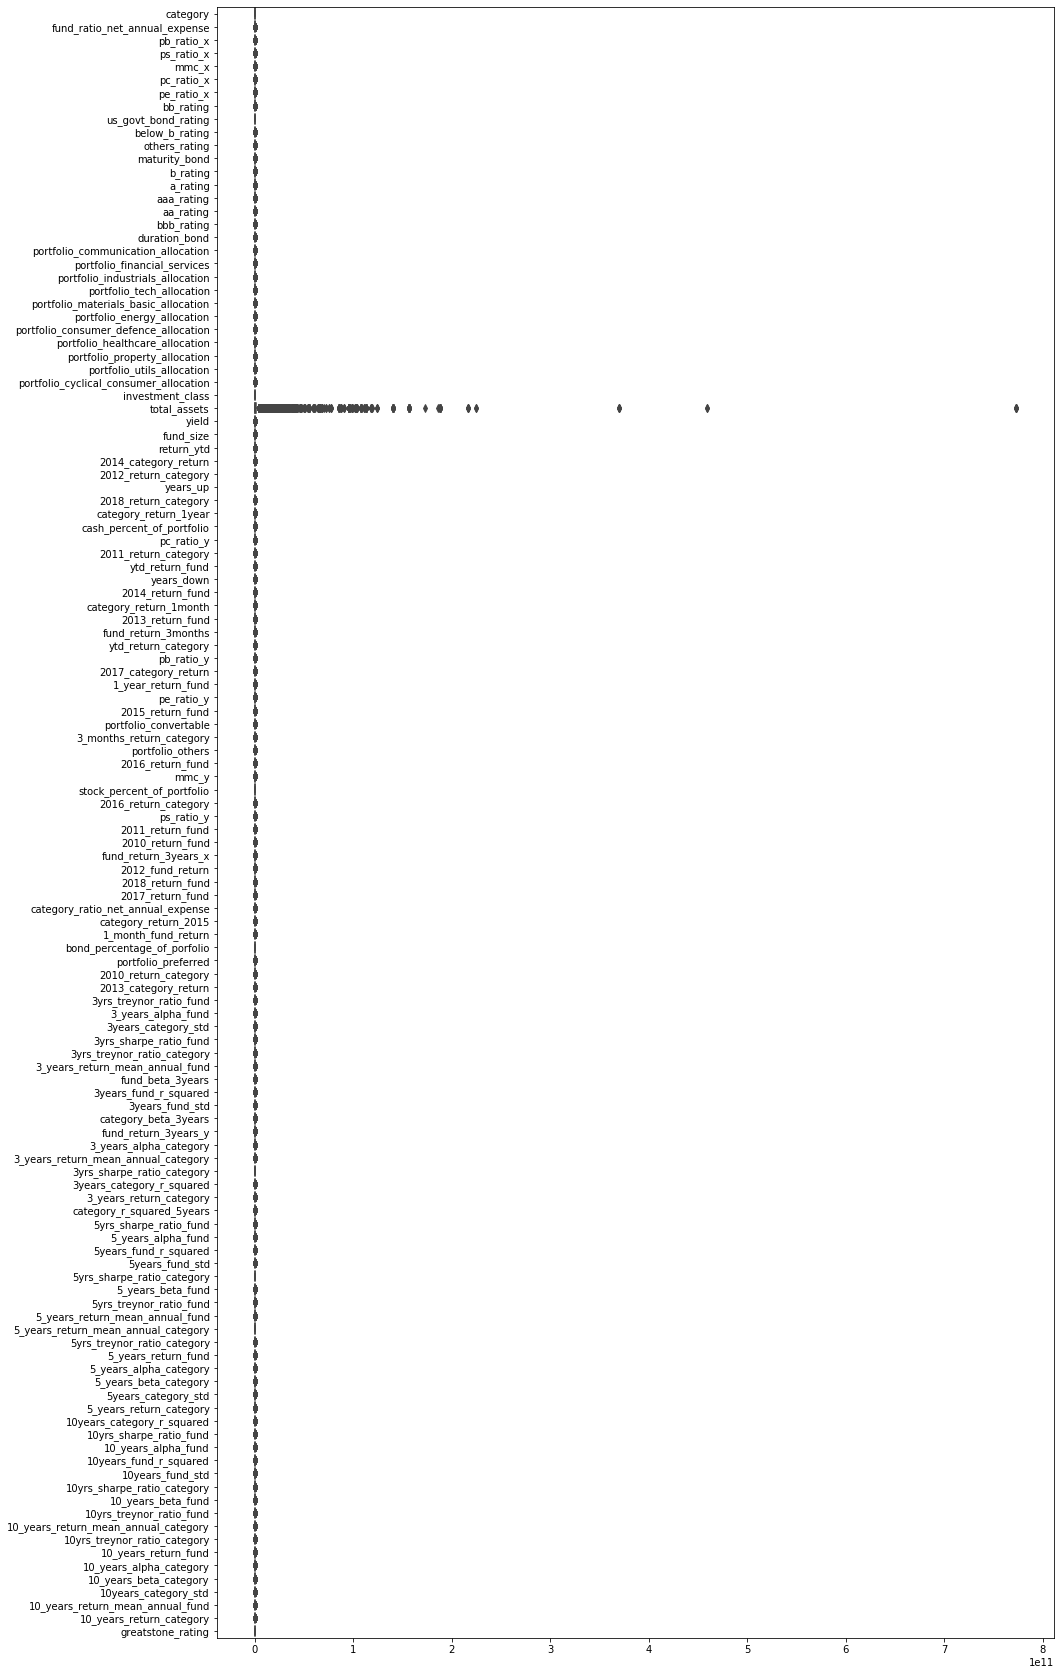

In [636]:
plt.figure(figsize=(15,30))
sns.boxplot(data=data, orient='h')

In [637]:
data.total_assets = outliers_handling(data.total_assets)

In [638]:
data

,category,fund_ratio_net_annual_expense,pb_ratio_x,ps_ratio_x,mmc_x,pc_ratio_x,pe_ratio_x,bb_rating,us_govt_bond_rating,below_b_rating,...,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category,greatstone_rating
1,42,0.58,5.30,3.38,72347.03,15.95,18.88,0.00,0.0,0.00,...,15.57,0.01,0.15,17.25,-0.01,0.01,0.14,1.42,15.94,3
2,42,0.99,5.40,3.67,68857.43,15.97,23.27,0.00,0.0,0.00,...,16.58,0.01,0.15,16.21,-0.01,0.01,0.14,1.33,15.94,4
3,43,0.52,2.23,1.63,43266.62,8.93,12.70,0.00,0.0,0.00,...,16.38,0.01,0.14,14.12,-0.02,0.01,0.13,1.16,13.68,3
4,90,0.75,2.02,1.40,43747.90,7.59,14.74,0.00,0.0,0.00,...,10.32,0.01,0.08,0.00,-0.02,0.01,0.12,0.90,11.53,0
5,13,1.90,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,8.44,0.01,0.09,10.77,0.00,0.01,0.10,0.91,11.07,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24991,76,1.64,1.69,1.54,27786.16,5.01,14.36,0.00,0.0,0.00,...,8.63,0.01,0.12,8.72,0.03,0.01,0.18,0.81,11.63,2
24993,24,1.64,1.22,0.88,29601.57,4.65,11.10,0.00,0.0,0.00,...,10.32,0.01,0.08,0.00,-0.00,0.01,0.16,0.90,8.43,2
24994,82,1.23,1.44,0.97,2096.25,6.70,14.41,0.00,0.0,0.00,...,12.60,0.01,0.13,16.66,-0.02,0.01,0.18,1.43,16.24,3
24995,43,1.12,1.78,1.11,45619.69,8.64,11.30,0.00,0.0,0.00,...,11.70,0.01,0.14,11.16,-0.02,0.01,0.13,0.95,13.68,1


In [639]:
X = data.drop(['greatstone_rating'], axis=1)
X = X.values

y = data.greatstone_rating.values
y = label_binarizer.fit_transform(y)

In [640]:
# metrics.SCORERS.keys()

In [641]:
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('rfc', RandomForestClassifier(n_estimators = 50, random_state=1, max_depth=30)))
rfcl = Pipeline(estimators)

kfold = KFold(n_splits=10, random_state=1, shuffle=True )

rfcl_cross_val_score = model_selection.cross_val_score(rfcl, X, y, cv=kfold, scoring='average_precision')

rfcl_cross_val_score

array([0.8724561 , 0.87372759, 0.88786118, 0.88494995, 0.88247517,
       0.87722294, 0.873958  , 0.87702724, 0.88155935, 0.89146461])

In [642]:
print(rfcl_cross_val_score.mean())

print(rfcl_cross_val_score.std())

0.8802702127185421
0.006122694778721978


In [643]:
# type(test_data)

In [644]:
# test_data.investment_class.fillna("Unknown", inplace=True)
# test_data.investment_class = labelencoder.fit_transform(test_data.investment_class)

# test_data.fund_size.fillna("Unknown", inplace=True)
# test_data.fund_size = labelencoder.fit_transform(test_data.fund_size)

# test_data.category = labelencoder.fit_transform(test_data.category)


In [645]:
# category_cols  = test_data.select_dtypes(['object']).columns.to_list()

In [646]:
# category_cols.append('tag')
# category_cols

In [647]:
# data.drop(category_cols, axis=1, inplace=True)

In [648]:
# final_status = rfcl.predict_proba(test_data)

In [649]:
# y = model_selection.cross_val_predict(rfcl, X, y, cv=kfold)

In [650]:
# label_binarizer.inverse_transform(y)

In [651]:
# submission = pd.DataFrame({'fund_id': fund_id, 'greatstone_rating': label_binarizer.inverse_transform(y)})